# Installing Packages and Prerequisite Dependencies

In [1]:
%pip install numpy
%pip install scikit-image
%pip install matplotlib
%pip install scikit-learn
%pip install pandas
%pip install tensorflow==2.10

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from setup import load_images, split as dataSplit, encodeLabel, cacheData;
from boundingbox import saveBBoxCoordinates, drawBoundingBox;
from performance import printConfMtx;
from Models import Model;
import constants;
import numpy as np;
import pandas as pd;
import random;

# Data Preparation for Classification - stonefly dataset

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


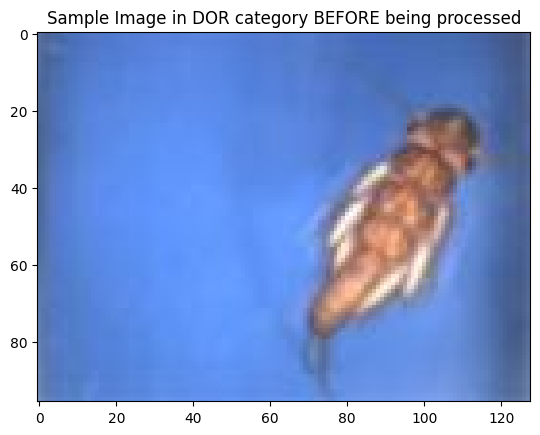

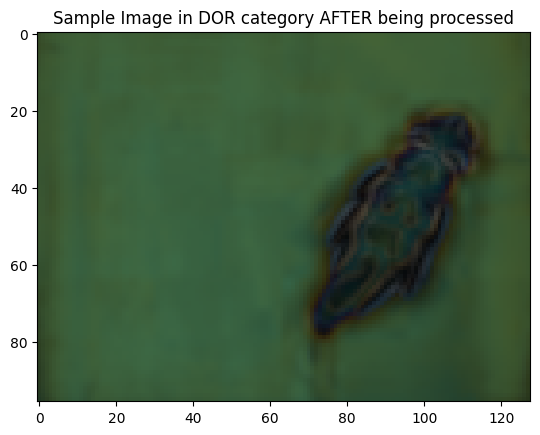

Total number of samples in the training set: 1089
Total number of labels in the training set: 1089
Unique labels in the training set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']
Total number of samples in the validation set: 273
Total number of labels in the validation set: 273
Unique labels in the validation set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [3]:
images, y = load_images(dataset=constants.STONEFLY, setName=constants.set0);
X_train, X_validation, y_train, y_validation = dataSplit(images, y);
# inspect the data
print(f"Total number of samples in the training set: {len(X_train)}");
print(f"Total number of labels in the training set: {len(y_train)}");
print(f"Unique labels in the training set: {np.unique(y_train)}");
print(f"Total number of samples in the validation set: {len(X_validation)}");
print(f"Total number of labels in the validation set: {len(y_validation)}");
print(f"Unique labels in the validation set: {np.unique(y_validation)}");

In [4]:
# save training set and validation set data for easier debugging
cacheData(X_train, "X_train.npy");
cacheData(X_validation, "X_validation.npy");
cacheData(y_train, "y_train.npy");
cacheData(y_validation, "y_validation.npy");

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


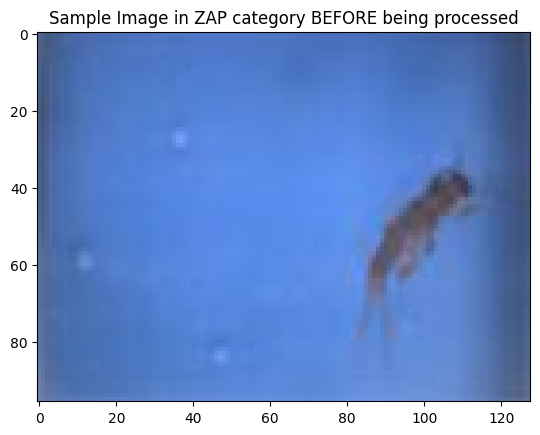

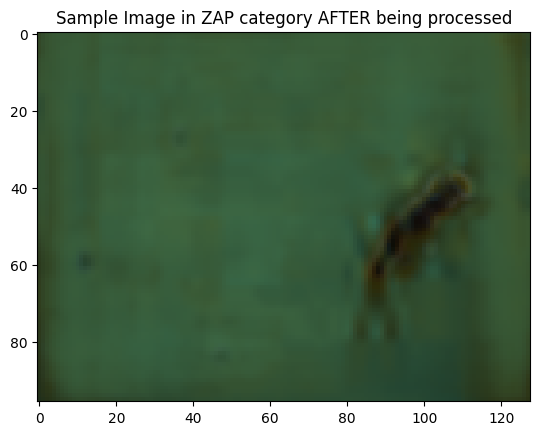

Total number of samples in the test set: 1480
Total number of labels in the test set: 1480
Unique labels in the test set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [5]:
X_test, y_test = load_images(dataset=constants.STONEFLY, setName=constants.set1);
print(f"Total number of samples in the test set: {len(X_test)}");
print(f"Total number of labels in the test set: {len(y_test)}");
print(f"Unique labels in the test set: {np.unique(y_test)}");

In [6]:
# save the test set data for easier debugging
cacheData(X_test, "X_test.npy");
cacheData(y_test, "y_test.npy");

# Basic Transfer Learning: Classification

## ResNet Classification

In [2]:
# Load the data from .npy files
X_train = np.load("X_train.npy");
y_train = np.load("y_-train.npy");
X_validation = np.load("X_validation.npy");
y_validation = np.load("y_validation.npy");
X_test = np.load("X_test.npy");
y_test = np.load("y_test.npy");

### Understanding the Features

In [8]:
# Training set
images = pd.Series(y_train);
images.value_counts()

zap    178
dor    143
hes    136
iso    136
yor    134
cal    133
swe    123
pte     71
mos     35
Name: count, dtype: int64

In [9]:
# Validation set
images = pd.Series(y_validation);
images.value_counts()

zap    45
dor    36
yor    34
hes    34
iso    34
cal    33
swe    30
pte    18
mos     9
Name: count, dtype: int64

In [10]:
# Test set
images = pd.Series(y_test);
images.value_counts()

yor    290
hes    200
iso    200
dor    194
swe    185
cal    171
zap    150
pte     55
mos     35
Name: count, dtype: int64

### Load the Model

In [11]:
model = Model();
model.build_classifier();

INFO:tensorflow:Assets written to: ram://cdcd5cf5-25b8-4d5c-b356-2e12daa56f42/assets


INFO:tensorflow:Assets written to: ram://cdcd5cf5-25b8-4d5c-b356-2e12daa56f42/assets


INFO:tensorflow:Assets written to: ram://c9f79bf6-0562-46e3-90a8-0d672368bdad/assets


INFO:tensorflow:Assets written to: ram://c9f79bf6-0562-46e3-90a8-0d672368bdad/assets


Now let's observe a summary of our classifiers.

In [12]:
model.resnet50.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 resnet50 (Functional)       (None, 3, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25,686,913
Trainable params: 2,099,201
Non-trainable params: 23,587,712
_________________________________________

In [13]:
model.resnet50V2.summary();

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 resnet50v2 (Functional)     (None, 3, 4, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_______________________________________

### Train the Classifiers

#### resnet50

Encoded Labels in training set: [0 1 2 3 4 5 6 7 8]
Encoded Labels in validation set: [0 1 2 3 4 5 6 7 8]


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/10
35/35 [==============================] - 10s 135ms/step - loss: -69.9239 - accuracy: 0.1313 - val_loss: -164.7523 - val_accuracy: 0.1319
Epoch 2/10
35/35 [==============================] - 3s 73ms/step - loss: -316.0874 - accuracy: 0.1313 - val_loss: -529.3665 - val_accuracy: 0.1319
Epoch 3/10
35/35 [==============================] - 3s 73ms/step - loss: -803.0163 - accuracy: 0.1313 - val_loss: -1170.8883 - val_accuracy: 0.1319
Epoch 4/10
35/35 [==============================] - 3s 74ms/step - loss: -1607.2976 - accuracy: 0.1313 - val_loss: -2149.9871 - val_accuracy: 0.1319
Epoch 5/10
35/35 [==============================] - 3s 73ms/step - loss: -2740.3396 - accuracy: 0.1313 - val_loss: -3469.2385 - val_accuracy: 0.1319
Epoch 6/10
35/35 [==============================] - 3s 74ms/step - loss: -4217.7788 - accuracy: 0.1313 - val_loss: -5077.6621 - val_accuracy: 0.1319
Epoch 7/10
35/35 [==============================] - 3s 73ms/step - loss: -5977.3755 - accuracy: 0.1313 - val_l

INFO:tensorflow:Assets written to: ram://182fd64a-c23b-45ff-8879-6c7839da3430/assets


INFO:tensorflow:Assets written to: ram://182fd64a-c23b-45ff-8879-6c7839da3430/assets


INFO:tensorflow:Assets written to: ram://74ac265d-55b5-4d4c-aa11-e55017ac3537/assets


INFO:tensorflow:Assets written to: ram://74ac265d-55b5-4d4c-aa11-e55017ac3537/assets


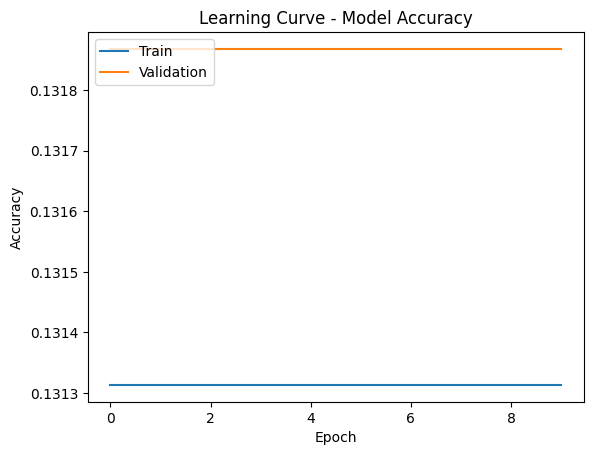

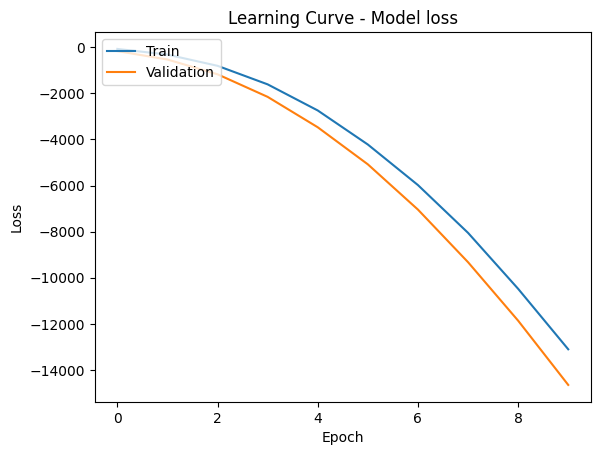

In [14]:
# resnet50
history_resnet50 = model.train(
    model.resnet50,
    X_train=X_train,
    y_train=y_train,
    X_val=X_validation,
    y_val=y_validation
);

Evaluate the Model

In [15]:
'''
Output Structure: tuple
first array: [training loss, training accuracy],
second array: [validation loss, validation accuracy],
third array: [test loss, test accuracy]
'''
model.evaluate(
    model=model.resnet50,
    X_train=X_train,
    y_train=encodeLabel(y_train),
    X_val=X_validation,
    y_val=encodeLabel(y_validation),
    X_test=X_test,
    y_test=encodeLabel(y_test)
)

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Binary Cross-Entropy error: -14603.6484375
Validation Binary Cross-Entropy error: -14649.4541015625
Testing Binary Cross-Entropy error: -14435.41796875


([-14603.6484375, 0.13131313025951385],
 [-14649.4541015625, 0.1318681389093399],
 [-14435.41796875, 0.13108107447624207])

#### resnet50V2

Encoded Labels in training set: [0 1 2 3 4 5 6 7 8]
Encoded Labels in validation set: [0 1 2 3 4 5 6 7 8]
Epoch 1/10


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35/35 [==============================] - 9s 146ms/step - loss: -722.9366 - accuracy: 0.1350 - val_loss: -1946.3093 - val_accuracy: 0.1319
Epoch 2/10
35/35 [==============================] - 2s 68ms/step - loss: -3989.9412 - accuracy: 0.1313 - val_loss: -7057.5151 - val_accuracy: 0.1319
Epoch 3/10
35/35 [==============================] - 2s 69ms/step - loss: -10675.8564 - accuracy: 0.1313 - val_loss: -15963.3994 - val_accuracy: 0.1319
Epoch 4/10
35/35 [==============================] - 2s 68ms/step - loss: -21360.6719 - accuracy: 0.1313 - val_loss: -29079.3340 - val_accuracy: 0.1319
Epoch 5/10
35/35 [==============================] - 2s 69ms/step - loss: -36673.9062 - accuracy: 0.1313 - val_loss: -47012.0938 - val_accuracy: 0.1319
Epoch 6/10
35/35 [==============================] - 2s 69ms/step - loss: -56630.0977 - accuracy: 0.1313 - val_loss: -69594.6484 - val_accuracy: 0.1319
Epoch 7/10
35/35 [==============================] - 2s 69ms/step - loss: -81137.8281 - accuracy: 0.1313 - val

INFO:tensorflow:Assets written to: ram://232c9d31-de49-4ad3-ab98-e0a0ea769505/assets


INFO:tensorflow:Assets written to: ram://232c9d31-de49-4ad3-ab98-e0a0ea769505/assets


INFO:tensorflow:Assets written to: ram://2de51cc5-1186-4634-83d0-0a5cee610f07/assets


INFO:tensorflow:Assets written to: ram://2de51cc5-1186-4634-83d0-0a5cee610f07/assets


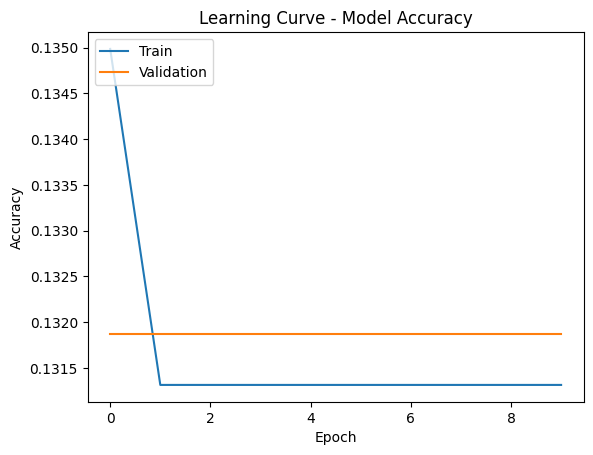

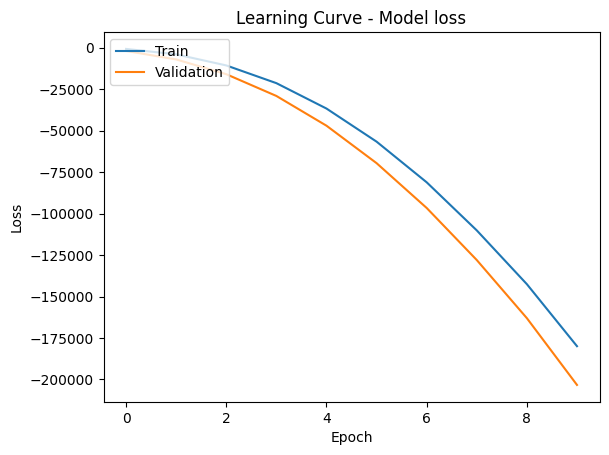

In [16]:
# resnet50V2
history_resnet50V2 = model.train(
    model.resnet50V2,
    X_train=X_train,
    y_train=y_train,
    X_val=X_validation,
    y_val=y_validation
);

Evaluate the Model

In [17]:
'''
Output Structure: tuple
first array: [training loss, training accuracy],
second array: [validation loss, validation accuracy],
third array: [test loss, test accuracy]
'''
model.evaluate(
    model=model.resnet50V2,
    X_train=X_train,
    y_train=encodeLabel(y_train),
    X_val=X_validation,
    y_val=encodeLabel(y_validation),
    X_test=X_test,
    y_test=encodeLabel(y_test)
)

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Binary Cross-Entropy error: -201187.078125
Validation Binary Cross-Entropy error: -203293.328125
Testing Binary Cross-Entropy error: -162743.40625


([-201187.078125, 0.13131313025951385],
 [-203293.328125, 0.1318681389093399],
 [-162743.40625, 0.13108107447624207])

### Make Prediction on the Test Set

#### resnet50

In [18]:
# resnet50
print("-----Training Set-----")
y_pred_resnet50_train = model.predict(model.resnet50, X_train);
print("-----Validation Set-----")
y_pred_resnet50_val = model.predict(model.resnet50, X_validation);
print("-----Test Set-----")
y_pred_resnet50_test = model.predict(model.resnet50, X_test);

-----Training Set-----
35/35 [==============================] - 3s 56ms/step
Number of Predictions made: 1089
Unique Labels in Prediction: ['dor']
-----Validation Set-----
3/9 [=========>....................] - ETA: 0s

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9/9 [==============================] - 0s 55ms/step
Number of Predictions made: 273
Unique Labels in Prediction: ['dor']
-----Test Set-----
 2/47 [>.............................] - ETA: 2s

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


47/47 [==============================] - 3s 55ms/step
Number of Predictions made: 1480
Unique Labels in Prediction: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### resnet50V2

In [19]:
# resnet50V2
print("-----Training Set-----")
y_pred_resnet50V2_train = model.predict(model.resnet50V2, X_train);
print("-----Validation Set-----")
y_pred_resnet50V2_val = model.predict(model.resnet50V2, X_validation);
print("-----Test Set-----")
y_pred_resnet50V2_test = model.predict(model.resnet50V2, X_test);

-----Training Set-----
35/35 [==============================] - 3s 52ms/step
Number of Predictions made: 1089
Unique Labels in Prediction: ['dor']
-----Validation Set-----
3/9 [=========>....................] - ETA: 0s

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9/9 [==============================] - 0s 51ms/step
Number of Predictions made: 273
Unique Labels in Prediction: ['dor']
-----Test Set-----
 1/47 [..............................] - ETA: 1s

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


47/47 [==============================] - 2s 52ms/step
Number of Predictions made: 1480
Unique Labels in Prediction: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Performance Evaluation

Print the Confusion Matrix

#### resnet50

In [20]:
# training set
confMtx_resnet50_train = printConfMtx(
    y_true=y_train,
    y_pred=y_pred_resnet50_train
);
confMtx_resnet50_train

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133
dor,0.0,143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143
hes,0.0,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136
iso,0.0,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71
swe,0.0,123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123
yor,0.0,134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134
zap,0.0,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178


In [21]:
# validation set
confMtx_resnet50_val = printConfMtx(
    y_true=y_validation,
    y_pred=y_pred_resnet50_val
);
confMtx_resnet50_val

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33
dor,0.0,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
hes,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
iso,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
mos,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
pte,0.0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
swe,0.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
yor,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
zap,0.0,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45


In [22]:
# test set
confMtx_resnet50_test = printConfMtx(
    y_true=y_test,
    y_pred=y_pred_resnet50_test
);
confMtx_resnet50_test

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171
dor,0.0,194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194
hes,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
iso,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
swe,0.0,185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185
yor,0.0,290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290
zap,0.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150


#### resnet50V2

In [23]:
# training set
confMtx_resnet50V2_train = printConfMtx(
    y_true=y_train,
    y_pred=y_pred_resnet50V2_train
);
confMtx_resnet50V2_train

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133
dor,0.0,143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143
hes,0.0,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136
iso,0.0,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71
swe,0.0,123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123
yor,0.0,134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134
zap,0.0,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178


In [24]:
# validation set
confMtx_resnet50V2_val = printConfMtx(
    y_true=y_validation,
    y_pred=y_pred_resnet50V2_val
);
confMtx_resnet50V2_val

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decoded Labels in Prediction array: ['dor']


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33
dor,0.0,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
hes,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
iso,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
mos,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
pte,0.0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
swe,0.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
yor,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
zap,0.0,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45


In [25]:
# test set
confMtx_resnet50V2_test = printConfMtx(
    y_true=y_test,
    y_pred=y_pred_resnet50V2_test
);
confMtx_resnet50V2_test

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171
dor,0.0,194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194
hes,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
iso,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
swe,0.0,185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185
yor,0.0,290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290
zap,0.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150


## Discussion

From the learning curves, we can see that:
- ResNet50 classifier was trained with a flat accuracy when the number of epochs were enlarging, in both training and validation sets.
- ResNet50 classifier gives a higher accuracy on the validation set than the training set. This reveals the issue of underfitting, since the training data failed to generalize the model well, with a lower accuracy.
- ResNet50V2 classifier was trained with a decreasing accuracy (in the training set) and a completely flat accuracy (in the validation set), respectively, when the number of epochs were enlarging. 
- ResNet50V2 classifier was trained initially with a higher accuracy on the training set, then its accuracy on the training set dropped below its accuracy on the validation set, and finally remained flat starting at a certain number of epochs. 
- From the ResNet50V2, the result also tells the issue of underfitting, which means that the training data failed to generalize the model well, in general with a lower accuracy.
- When the accuracy of a model remains flat, this means a model failing to learn meaningful patterns in the data.
- Meanwhile, the losses of both models in both the training and the validation set data dropped significantly when the number of epochs were enlarging. This is a good sign however because we are certain that by enlarging the number of epochs used to train a model can reduce the loss of the model, and thus enhance its accuracy. 

From the confusion matricies, we can see that:
- Both classifiers give predictions (based on any set of data) all being from the same label. 
- Such observation is a sign of class imbalance where there exist biases in the training, validation or even the test data.

As a result of the models failing to learn patterns from the data when the number of epochs is large enough, it is therefore a sign of underfitting. 

# Basic Transfer Learning: Regression Network for Bounding Box

## Data Preprocessing

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


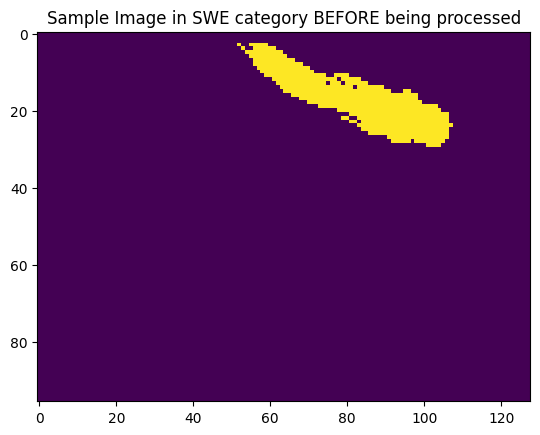

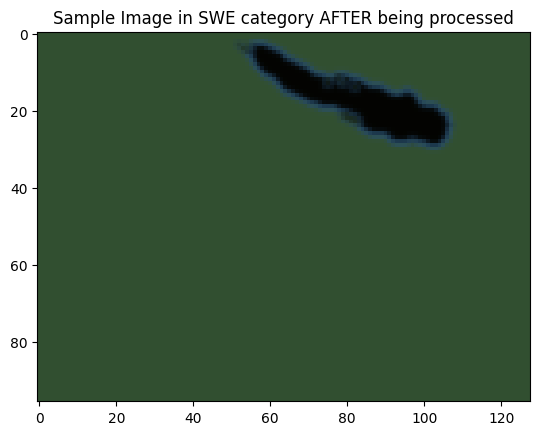

Total number of samples in the segmented training set: 1084
Total number of labels in the segmented training set: 1084
Unique labels in the segmented training set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']
Total number of samples in the segmented validation set: 272
Total number of labels in the segmented validation set: 272
Unique labels in the segmented validation set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [9]:
images_set0, y_set0 = load_images(constants.SEGMENTATION, constants.set0);
X_seg_train, X_seg_validation, y_seg_train, y_seg_validation = dataSplit(images_set0, y_set0);
# inspect the data
print(f"Total number of samples in the segmented training set: {len(X_seg_train)}");
print(f"Total number of labels in the segmented training set: {len(y_seg_train)}");
print(f"Unique labels in the segmented training set: {np.unique(y_seg_train)}");
print(f"Total number of samples in the segmented validation set: {len(X_seg_validation)}");
print(f"Total number of labels in the segmented validation set: {len(y_seg_validation)}");
print(f"Unique labels in the segmented validation set: {np.unique(y_seg_validation)}");

In [10]:
# save the segmented training set and validation set data for easier debugging
cacheData(X_seg_train, "X_seg_train.npy");
cacheData(X_seg_validation, "X_seg_validation.npy");
cacheData(y_seg_train, "y_seg_train.npy");
cacheData(y_seg_validation, "y_seg_validation.npy");

In [11]:
X_seg_test, y_seg_test = load_images(dataset=constants.SEGMENTATION, setName=constants.set1);
print(f"Total number of samples in the segmented test set: {len(X_seg_test)}");
print(f"Total number of labels in the segmented test set: {len(y_seg_test)}");
print(f"Unique labels in the segmented test set: {np.unique(y_seg_test)}");

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


Total number of samples in the segmented test set: 1330
Total number of labels in the segmented test set: 1330
Unique labels in the segmented test set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [12]:
# save the segmented test set data for easier debugging
cacheData(X_seg_test, "X_seg_test.npy");
cacheData(y_seg_test, "y_seg_test.npy");

### Test Segmentation File Paths in an External Textfile

In [13]:
file_set0 = open("segmentation-set0-image-paths.txt", "r");
file_set1 = open("segmentation-set1-image-paths.txt", "r");
# splitting the contents into file paths
pathPattern = ".\segmentation";
arr_set0_paths = file_set0.read().split(pathPattern);
arr_set1_paths = file_set1.read().split(pathPattern);
# removing unnecessary items from the list
arr_set0_paths.remove("");
arr_set1_paths.remove("");
# investigate the image paths being read
print(f"Expected Number of Image Paths in set 0: {len(images_set0)}");
print(f"Expected Number of Image Paths in set 1: {len(X_seg_test)}");
print(f"Number of Image Paths being read from set 0: {len(arr_set0_paths)}");
print(f"Number of Image Paths being read from set 1: {len(arr_set1_paths)}");
file_set0.close();
file_set1.close();

Expected Number of Image Paths in set 0: 1356
Expected Number of Image Paths in set 1: 1330
Number of Image Paths being read from set 0: 1356
Number of Image Paths being read from set 1: 1330


### Check the Resolution of a random Segmented Image

In [14]:
# set 0
randInd: int = random.randint(0, len(images_set0) - 1);
randImg = images_set0[randInd];
print(f"Resolution of a random Segmented Image in set 0: {randImg.shape[0]} pixels x {randImg.shape[1]} pixels.");
# set 1
randInd: int = random.randint(0, len(X_seg_test) - 1);
randImg = X_seg_test[randInd];
print(f"Resolution of a random Segmented Image in set 0: {randImg.shape[0]} pixels x {randImg.shape[1]} pixels.");

Resolution of a random Segmented Image in set 0: 96 pixels x 128 pixels.
Resolution of a random Segmented Image in set 0: 96 pixels x 128 pixels.


### Identify the Bounding Box Coordinates

Note: Please manually remove `bbox.txt` file if it exists on your hard drive, as the following process is going to append lines of text into this file. Please allow the program to create a new file. 

#### Set 0

-----set0-----


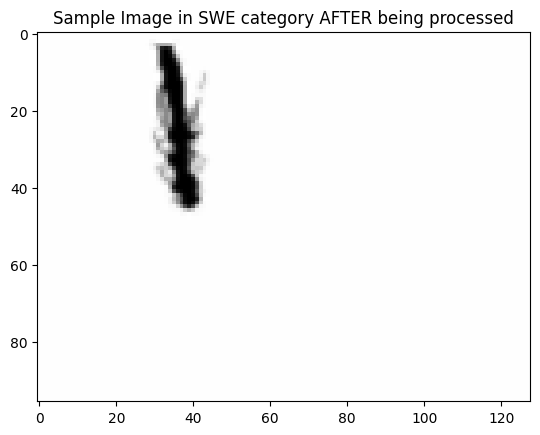

Shape of an image in this set: (96, 128)
Image Name: Swe_35-specimen-i004-s125
Number of non-zero row indices in an image in this set: 12288
Number of non-zero column indices in an image in this set: 12288
Height of an image in set0: 96
Width of an image in set0: 128
Lower left corner of an image in set0: (0.0, 0.0)
Upper right corner of an image in set0: (0.9921875, 0.9895833333333334)
Total Number of Bounding Box coordinates recorded: 1356


In [15]:
file_set0 = open("segmentation-set0-image-paths.txt", "r");
bbox_set0 = saveBBoxCoordinates(
    images_set=images_set0,
    y_images_set=y_set0,
    img_paths=file_set0.read(),
    setName=constants.set0
);
file_set0.close();
print(f"Total Number of Bounding Box coordinates recorded: {len(bbox_set0)}");

Set 1

-----set1-----


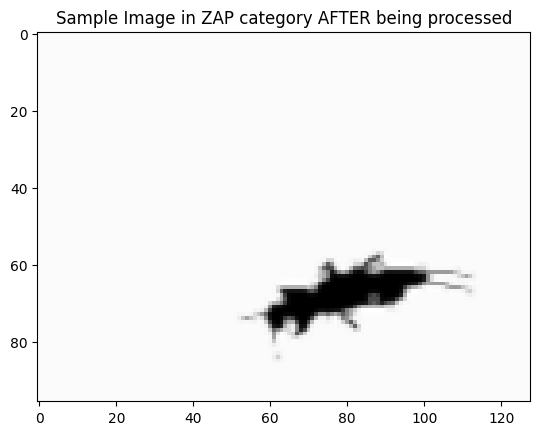

Shape of an image in this set: (96, 128)
Image Name: Zap_55-specimen-i001-s125
Number of non-zero row indices in an image in this set: 12288
Number of non-zero column indices in an image in this set: 12288
Height of an image in set1: 96
Width of an image in set1: 128
Lower left corner of an image in set1: (0.0, 0.0)
Upper right corner of an image in set1: (0.9921875, 0.9895833333333334)
Total Number of Bounding Box coordinates recorded: 1330


In [16]:
file_set1 = open("segmentation-set1-image-paths.txt", "r");
bbox_set1 = saveBBoxCoordinates(
    images_set=X_seg_test,
    y_images_set=y_seg_test,
    img_paths=file_set1.read(),
    setName=constants.set1
);
file_set1.close();
print(f"Total Number of Bounding Box coordinates recorded: {len(bbox_set1)}");

### Inspect the generated `bbox.txt` file

In [17]:
file_bbox = open(constants.BBOX_FILENAME, "r");
print(f"Number of Bounding Box Coordinates printed in the textfile: {len(file_bbox.readlines())}");
print(f"Number of Bounding Box Coordinates recorded for set 0: {len(bbox_set0)}");
print(f"Number of Bounding Box Coordinates recorded for set 1: {len(bbox_set1)}");
file_bbox.close();

Number of Bounding Box Coordinates printed in the textfile: 8822
Number of Bounding Box Coordinates recorded for set 0: 1356
Number of Bounding Box Coordinates recorded for set 1: 1330


### Try drawing a Bounding Box

Note: Before training, it shouldn't be able to circle correctly an object in an image. 

-----set 0-----


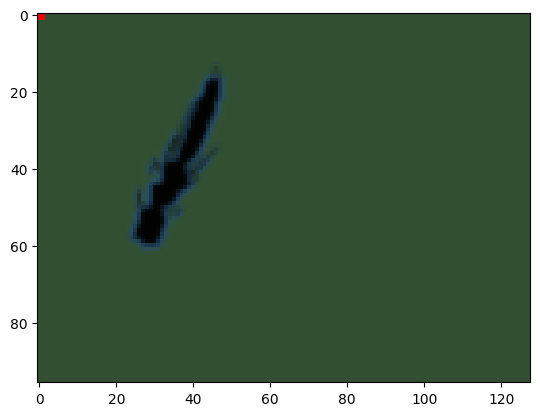

Bounding Box is successfully drawn


In [18]:
# set 0
print("-----set 0-----");
res = drawBoundingBox(
    bboxFilepath=constants.BBOX_FILENAME,
    X_imageSet=images_set0,
    y_imageSet=y_set0,
    setName=constants.set0
);
print("Bounding Box is successfully drawn" if res == True else "Failed to draw a bounding box in an image.");

-----set 1-----


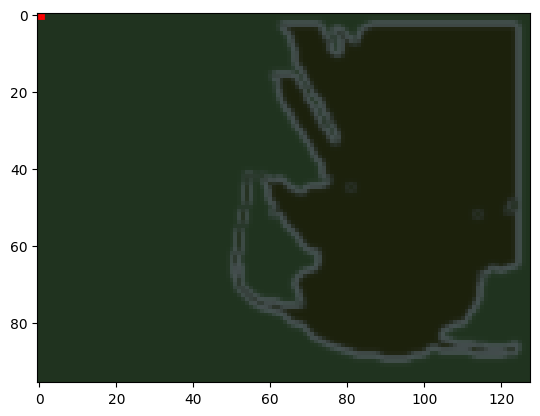

Bounding Box is successfully drawn


In [20]:
# set 1
print("-----set 1-----");
res = drawBoundingBox(
    bboxFilepath=constants.BBOX_FILENAME,
    X_imageSet=X_seg_test,
    y_imageSet=y_seg_test,
    setName=constants.set1
);
print("Bounding Box is successfully drawn" if res == True else "Failed to draw a bounding box in an image.");